In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import matplotlib.cm as cm
import numpy.polynomial.polynomial as poly


import math
import pandas as pd
from pandas import DataFrame, read_csv
import pylab as pl
import time
from sympy import *

In [2]:
c13, c12, s12, s13, Dm21, Dm31, ml, alpha, beta = symbols('c13 c12 s12 s13 Dm21 Dm31 ml alpha beta',real=True)

In [3]:
"""This computes the error function for the Normal ordering"""
Mee = sqrt((c13*c12*ml+c13*s12*sqrt(ml**2+Dm21)*cos(2*alpha)+s13*sqrt(ml**2+Dm31)*cos(2*beta))**2  \
           +(c13*s12*sqrt(ml**2+Dm21)*sin(2*alpha)+s13*sqrt(ml**2+Dm31)*sin(2*beta))**2)

fitvals = [(c13,0.978),(c12,0.696),(s12,0.304),(s13,0.0219),(Dm21,7.5e-5),(Dm31,2.458e-3)]
Pc13 = diff(Mee,c13).subs(fitvals)**2
Pc12 = diff(Mee,c12).subs(fitvals)**2
Ps13 = diff(Mee,s13).subs(fitvals)**2
Ps12 = diff(Mee,s12).subs(fitvals)**2
Pm21 = diff(Mee,Dm21).subs(fitvals)**2
Pm31 = diff(Mee,Dm31).subs(fitvals)**2

c13c12 = 0.680  
c13s12 = 0.300 
s13    = 0.0219

Dm21 = 7.5e-5  
Dm31 = 2.458e-3  
Dm32 = 2.448e-3  

E1norm = sqrt(Pc13*(.001)**2+Pc12*(.012)**2+Ps13*(.001)**2+Ps12*(.012)**2+Pm21*(.18e-5)**2+Pm31*(.046e-3)**2)
E3norm = sqrt(Pc13*(.0063)**2+Pc12*(.037)**2+Ps13*(.0063)**2+Ps12*(.037)**2+Pm21*(.53e-5)**2+Pm31*(.141e-3)**2)


In [4]:
c13, c12, s12, s13, Dm21, Dm31, Dm32, ml, alpha, beta = symbols('c13 c12 s12 s13 Dm21 Dm31 Dm32 ml alpha beta',real=True)

In [5]:
"""This computes the error function for the Inverted ordering"""
Mee = sqrt((c13*c12*sqrt(ml**2+Dm31)+c13*s12*sqrt(ml**2+Dm32)*cos(2*alpha)+s13*ml*cos(2*beta))**2  \
           +(c13*s12*sqrt(ml**2+Dm32)*sin(2*alpha)+s13*ml*sin(2*beta))**2)

fitvals = [(c13,0.978),(c12,0.696),(s12,0.304),(s13,0.0219),(Dm31,2.458e-3 ),(Dm32,2.448e-3)]
Pc13 = diff(Mee,c13).subs(fitvals)**2
Pc12 = diff(Mee,c12).subs(fitvals)**2
Ps13 = diff(Mee,s13).subs(fitvals)**2
Ps12 = diff(Mee,s12).subs(fitvals)**2
Pm31 = diff(Mee,Dm31).subs(fitvals)**2
Pm32 = diff(Mee,Dm32).subs(fitvals)**2

c13c12 = 0.680  
c13s12 = 0.300 
s13    = 0.0219

Dm21 = 7.5e-5  
Dm31 = 2.458e-3  
Dm32 = 2.448e-3  

E1inv = sqrt(Pc13*(.001)**2+Pc12*(.012)**2+Ps13*(.001)**2+Ps12*(.012)**2+Pm31*(.18e-5)**2+Pm32*(.046e-3)**2)
E3inv = sqrt(Pc13*(.0063)**2+Pc12*(.037)**2+Ps13*(.0063)**2+Ps12*(.037)**2+Pm31*(.53e-5)**2+Pm32*(.141e-3)**2)


In [6]:
c13c12 = 0.680  
c13s12 = 0.300 
s13    = 0.0219

Dm21 = 7.5e-5  
Dm31 = 2.458e-3  
Dm32 = 2.448e-3  

E1norm = sqrt(Pc13*(.001)**2+Pc12*(.012)**2+Ps13*(.001)**2+Ps12*(.012)**2+Pm21*(.18e-5)**2+Pm31*(.046e-3)**2)
E3norm = sqrt(Pc13*(.0063)**2+Pc12*(.037)**2+Ps13*(.0063)**2+Ps12*(.037)**2+Pm21*(.53e-5)**2+Pm31*(.141e-3)**2)


In [7]:
""" Mee^2 = A(ml)^2 + B(ml)^2 """

def Anorm(ml,alpha,beta):
    return c13c12*ml+c13s12*np.sqrt(ml**2+Dm21)*np.cos(2*alpha)+s13*np.sqrt(ml**2+Dm31)*np.cos(2*beta)
def Bnorm(ml,alpha,beta):
    return c13s12*np.sqrt(ml**2+Dm21)*np.sin(2*alpha)+s13*np.sqrt(ml**2+Dm31)*np.sin(2*beta)

def Ainv(ml,alpha,beta):
    return c13c12*np.sqrt(ml**2+Dm31)+c13s12*np.sqrt(ml**2+Dm32)*np.cos(2*alpha)+s13*ml*np.cos(2*beta)
def Binv(ml,alpha,beta):
    return c13s12*np.sqrt(ml**2+Dm32)*np.sin(2*alpha)+s13*ml*np.sin(2*beta)


In [8]:
vals = np.logspace(-4,0,num=1000)

In [9]:
error1=[]
for x in range(0,len(vals)):
    hold = E1norm.subs([(ml,vals[x]),(alpha,np.pi/2),(beta,np.pi/2)])
    error1.append(hold)

In [10]:
error1 = np.array(error1)

In [11]:
A = Anorm(vals,np.pi/2,np.pi/2)**2
B = Bnorm(vals,np.pi/2,np.pi/2)**2
test = np.sqrt(A+B)

C = Ainv(vals,np.pi/2,np.pi/2)**2
D = Binv(vals,np.pi/2,np.pi/2)**2
test = np.sqrt(C+D)

In [55]:
def Thalf(x):
    return 0.1257*0.55e25/(x)**2

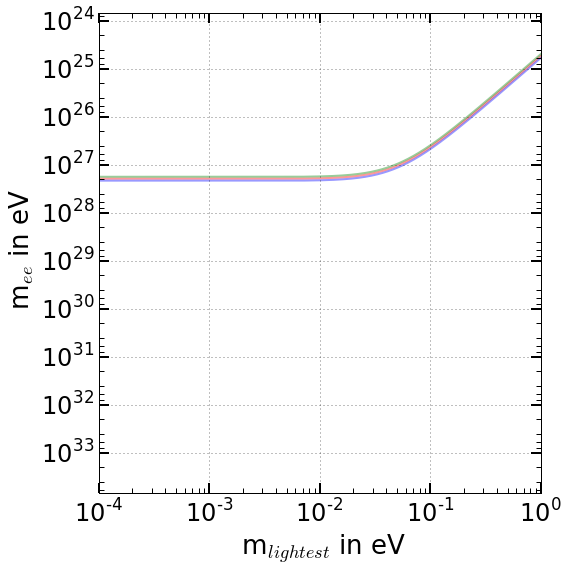

In [13]:
plt.figure(figsize=(8,8))

plt.loglog(vals,Thalf(test),color='r',linewidth=2,alpha=0.4)
plt.loglog(vals,Thalf(test+error1),color='g',linewidth=2,alpha=0.4)
plt.loglog(vals,Thalf(test-error1),color='b',linewidth=2,alpha=0.4)


plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' m$_{ee}$ in eV',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(Thalf(1e-5),Thalf(1))
plt.xlim(1e-4,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/limitsNormal.png')
plt.show()

In [9]:
bb = np.linspace(0, 2*3.14, num=30)
vals = np.logspace(-5,0,num=1000)

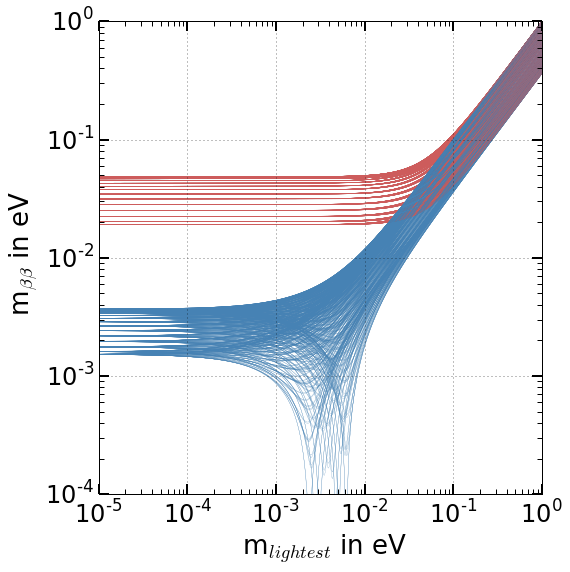

12.404803991317749

In [217]:
plt.figure(figsize=(8,8))
t1=time.time()

for x in range(0,len(bb)):
    for y in range(0,len(bb)): 
        A = Anorm(vals,bb[x],bb[y])**2
        B = Bnorm(vals,bb[x],bb[y])**2
        test = np.sqrt(A+B)
        C = Ainv(vals,bb[x],bb[y])**2
        D = Binv(vals,bb[x],bb[y])**2
        test2 = np.sqrt(C+D)
        plt.loglog(vals,test,color='steelblue',linewidth=.2)
        plt.loglog(vals,test2,color='indianred',linewidth=.2)

plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' m$_{\beta\beta}$ in eV',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(1e-4,1)
plt.xlim(1e-5,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/hierarchy-plots-line-900.png')
plt.show()
t2=time.time()
t2-t1

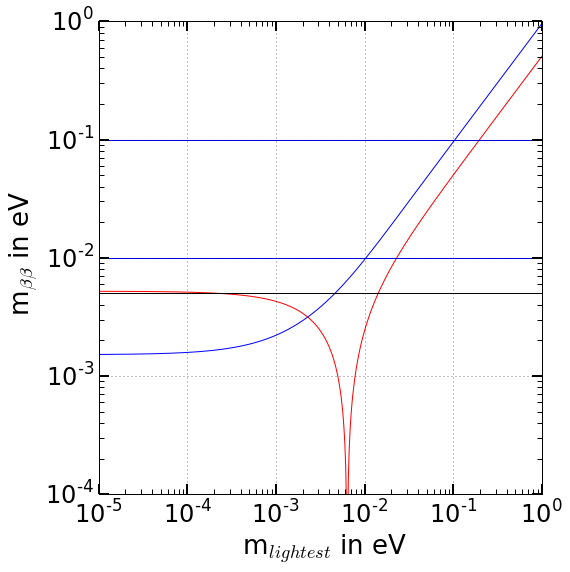

0.8897180557250977

In [24]:
plt.figure(figsize=(8,8))
t1=time.time()


A = Anorm(vals,0,np.pi/2)**2
B = Bnorm(vals,0,np.pi/2)**2
test = np.sqrt(A+B)
C = Anorm(vals,np.pi/2,np.pi/2)**2
D = Anorm(vals,np.pi/2,np.pi/2)**2
test2 = np.sqrt(C+D)
plt.loglog(vals,test,color='b',linewidth=1)
plt.loglog(vals,test2,color='r',linewidth=1)

plt.axhline(1e-1)
plt.axhline(1e-2)
plt.axhline(5e-3,color='k')

plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' m$_{\beta\beta}$ in eV',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(1e-4,1)
plt.xlim(1e-5,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/hierarchy-plots-line-900.png')
plt.show()
t2=time.time()
t2-t1

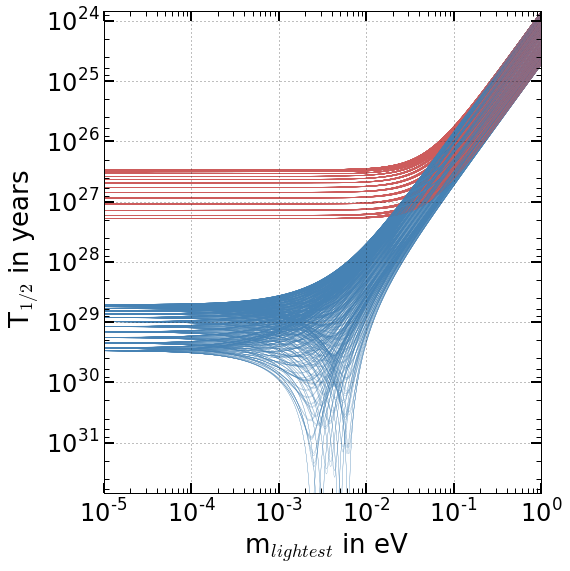

15.446102857589722

In [275]:
plt.figure(figsize=(8,8))
t1=time.time()

for x in range(0,len(bb)):
    for y in range(0,len(bb)): 
        A = Anorm(vals,bb[x],bb[y])**2
        B = Bnorm(vals,bb[x],bb[y])**2
        test = np.sqrt(A+B)
        C = Ainv(vals,bb[x],bb[y])**2
        D = Binv(vals,bb[x],bb[y])**2
        test2 = np.sqrt(C+D)
        plt.loglog(vals,Thalf(test),color='steelblue',linewidth=.2)
        plt.loglog(vals,Thalf(test2),color='indianred',linewidth=.2)

plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' T$_{1/2}$ in years',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(Thalf(1e-4),Thalf(1))
plt.xlim(1e-5,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/hierarchy-plots-line-900-T.png')
plt.show()
t2=time.time()
t2-t1

In [16]:
vals = np.logspace(-4,-2,num=500)
qw = [1e-2,5e-3,4e-3,3.5e-3,3e-3,2.5e-3,2e-3,1.5e-3,1e-3,5e-4,3e-4,2e-4,1e-4,5e-5,2e-5,1e-5]
space = np.array(qw)
space

array([  1.00000000e-02,   5.00000000e-03,   4.00000000e-03,
         3.50000000e-03,   3.00000000e-03,   2.50000000e-03,
         2.00000000e-03,   1.50000000e-03,   1.00000000e-03,
         5.00000000e-04,   3.00000000e-04,   2.00000000e-04,
         1.00000000e-04,   5.00000000e-05,   2.00000000e-05,
         1.00000000e-05])

In [17]:

angles=[]
percent=[]
Mjvals = np.linspace(0, 2*3.14, num=500) # 1000 works takes a min,
LMj = len(Mjvals)
for q in range(0,len(space)):
    pit = []
    for x in range(0,LMj):
        for y in range(0,LMj):
            A = Anorm(vals,Mjvals[x],Mjvals[y])**2
            B = Bnorm(vals,Mjvals[x],Mjvals[y])**2
            test = np.sqrt(A+B)
            qwe = min(test)
            if qwe<space[q]:
                pit.append((Mjvals[x],Mjvals[y]))
    prcnt = (len(pit)/LMj**2)*100
    percent.append(prcnt)
    angles.append(pit)
        


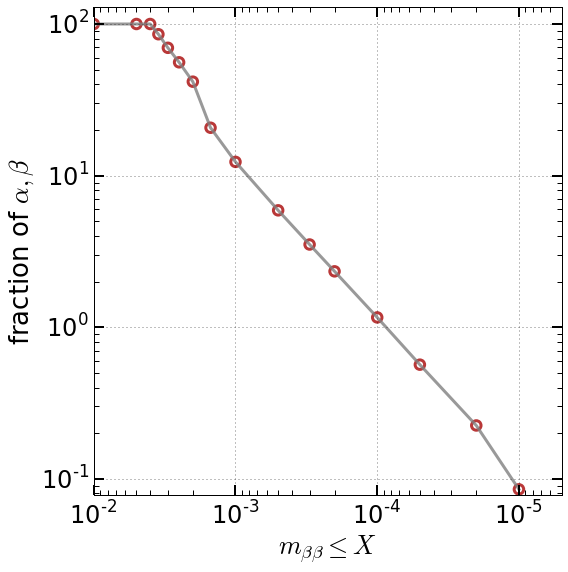

In [276]:
plt.figure(figsize=(8,8))

plt.loglog(space,percent,color='grey',linewidth=3,alpha=0.8)
plt.scatter(space,percent, facecolors='none', edgecolors='firebrick',s=90,alpha=0.9,linewidth=3)

plt.ylabel(r"fraction of $\alpha,\beta$",fontsize=26)
plt.xlabel(r'$m_{\beta\beta}\leq X$',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(-10,130)
plt.xlim(1e-2,5e-6)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/mbb-fractionLL.png')
plt.show()

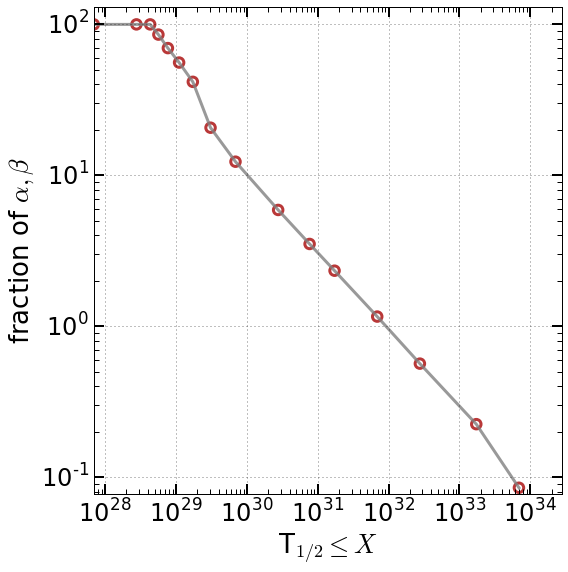

In [278]:
plt.figure(figsize=(8,8))

plt.loglog(Thalf(space),percent,color='grey',linewidth=3,alpha=0.8)
plt.scatter(Thalf(space),percent, facecolors='none', edgecolors='firebrick',s=90,alpha=0.9,linewidth=3)

plt.ylabel(r"fraction of $\alpha,\beta$",fontsize=26)
plt.xlabel(r'T$_{1/2}\leq X$',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(-10,130)
plt.xlim(Thalf(1e-2),Thalf(5e-6))
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/mbb-fractionLL-T.png')
plt.show()

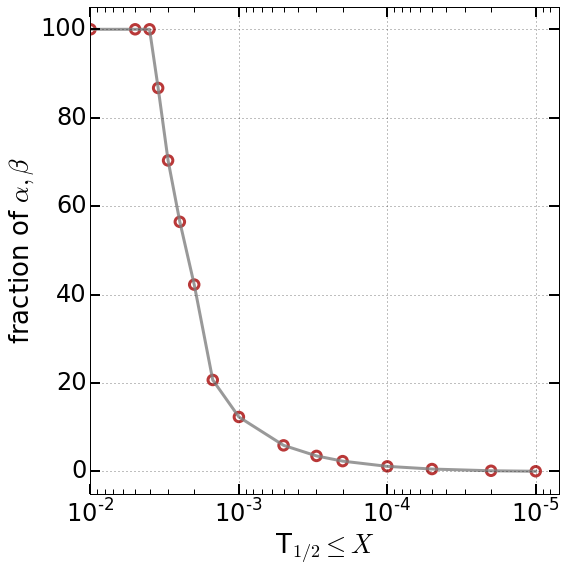

In [60]:
plt.figure(figsize=(8,8))

plt.semilogx((space),percent,color='grey',linewidth=3,alpha=0.8)
plt.scatter((space),percent, facecolors='none', edgecolors='firebrick',s=90,alpha=0.9,linewidth=3)

plt.ylabel(r"fraction of $\alpha,\beta$",fontsize=26)
plt.xlabel(r'T$_{1/2}\leq X$',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(-5,105)
plt.xlim((1e-2),(7e-6))
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/mbb-fractionLx-T.png')
plt.show()

In [38]:
from matplotlib.colors import LogNorm


In [61]:
XX=[]
YY=[]
for x in range(3,len(angles)):
    X, Y = zip(*angles[x])
    XX.append(X)
    YY.append(Y)
XX  = [item for sublist in XX for item in sublist]
YY = [item for sublist in YY for item in sublist]

In [62]:
XX  = [item for sublist in XX for item in sublist]

In [63]:
YY= [item for sublist in YY for item in sublist]

In [64]:
len(YY)

748890

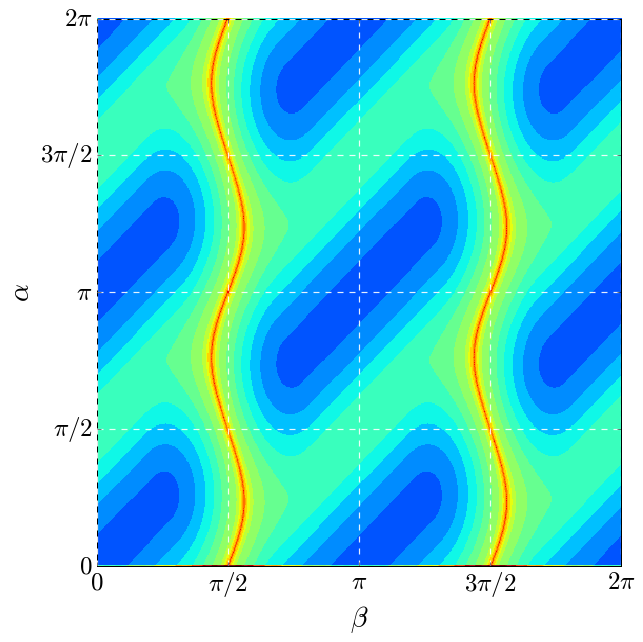

In [58]:
plt.figure(figsize=(9,9))
bins=500
Tvals = [0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi]
Tnames = (r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$')
#plt.title(r'Cut space random Na only',fontsize=20)
xedges, yedges = np.linspace(0, 2*np.pi, bins), np.linspace(0, 2*np.pi, bins)
plt.hist2d(XX, YY, bins=(xedges, yedges))
#plt.colorbar()
plt.clim(0,19)
plt.xticks(Tvals,Tnames,fontsize=25)
plt.yticks(Tvals,Tnames,fontsize=25)

plt.xlim(0,2*np.pi)
plt.ylim(0,2*np.pi)
plt.xlabel(r'$\beta$',fontsize=28)
plt.ylabel(r'$\alpha$',fontsize=28)
plt.grid(True,color='w', linestyle='--', linewidth=1.2,alpha=0.9)
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/AB-colormap-nofit.png')
plt.show()

In [11]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
def CutFrac(a,b,c):
    values = a
    line = b
    CUT = c
    LL=len(line)
    dx = np.diff(values)
    ML = np.where(line==min(line))[0][0]
    PR = find_nearest(line[ML:LL],CUT)
    XR = np.where(line[ML:LL]==PR)[0][0] + ML
    if XR>10:
        if max(line[0:XR]) > PR :

            PL = find_nearest(line[0:ML],CUT)
        #PR = find_nearest(line[ML:LL],CUT)
            XL = np.where(line[0:ML]==PL)[0][0]
        #XR = np.where(line[ML:LL]==PR)[0][0] + ML
            lineL = line[0:XL]
            valuesL=values[0:XL]

            lineM = line[XL:XR]
'''            valuesM=values[XL:XR]

            lineR = line[XR:LL]
            valuesR=values[XR:LL]

            dlineM = abs(np.diff(lineM))
            dvaluesM= np.diff(valuesM)
            dline  = abs(np.diff(line))
            dvalues = np.diff(values)

            curve  = sum((dline**2+dvalues**2)**1/2)
            curveM = sum((dlineM**2+dvaluesM**2)**1/2)'''

            curve  =len(line) 
            curveM = len(lineM)
            R = curveM/curve
        else:
            lineL = line[0:XR]
            '''valuesL=values[0:XR]
            dlineL = abs(np.diff(lineL))
            dvaluesL= np.diff(valuesL)

            dline  = abs(np.diff(line))
            dvalues = np.diff(values)

            curve  = sum((dline**2+dvalues**2)**1/2)
            curveM = sum((dlineL**2+dvaluesL**2)**1/2)'''
            
            
            curve  =len(line) 
            curveM = len(lineL)
            R = curveM/curve
            R=0
    else:
        R=0
    return R

IndentationError: unexpected indent (<ipython-input-11-7850d22d083d>, line 37)

In [12]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
def CutFrac(a,b,c):
    values = a
    line = b
    CUT = c
    LL=len(line)
    dx = np.diff(values)
    ML = np.where(line==min(line))[0][0]
    PR = find_nearest(line[ML:LL],CUT)
    XR = np.where(line[ML:LL]==PR)[0][0] + ML
    if XR>10:
        if max(line[0:XR]) > PR :

            PL = find_nearest(line[0:ML],CUT)
        #PR = find_nearest(line[ML:LL],CUT)
            XL = np.where(line[0:ML]==PL)[0][0]
        #XR = np.where(line[ML:LL]==PR)[0][0] + ML
            #lineL = line[0:XL]
            #valuesL=values[0:XL]

            #lineM = line[XL:XR]

            curve  =abs(values[-1]-values[0]) 
            curveM = abs(XR-XL)
            R = curveM/curve
        else:
            lineL = line[0:XR]
            
            curve  =abs(values[-1]-values[0])
            curveM = abs(XR)
            R = curveM/curve
            #R=0
    else:
        R=0
    return R

In [13]:
vals = np.logspace(-5,-0,num=500)
#qw = [1e-1,1e-2,5e-3,4e-3,3.5e-3,3e-3,2.5e-3,2e-3,1.5e-3,1e-3,5e-4,3e-4,2e-4,1e-4,5e-5,2e-5,1e-5]

qw = [5e-3,4e-3,3.5e-3,3e-3,2.5e-3,2e-3,1.5e-3,1e-3,5e-4,3e-4,2e-4,1e-4,5e-5,2e-5,1e-5]

#qw = [1e-2]#[1.5e-3,1e-3,5e-4,3e-4,2e-4,1e-4,5e-5,2e-5,1e-5]
#qw = [4e-3,3.5e-3,3e-3]
space = np.array(qw)

In [14]:
angles=[]
percent=[]
percent2=[]
holdBad=[]
Mjvals = np.linspace(0, 2*3.14, num=500) # 1000 works takes a min,

LMj = len(Mjvals)
for q in range(0,len(space)):
    pit = []
    howbad=0
    for x in range(0,LMj):
        for y in range(0,LMj):
            A = Anorm(vals,Mjvals[x],Mjvals[y])**2
            B = Bnorm(vals,Mjvals[x],Mjvals[y])**2
            test = np.sqrt(A+B)
            qwe = min(test)
            if qwe<space[q]:
                HowBad = CutFrac(vals,test,space[q])
                pit.append((Mjvals[x],Mjvals[y],HowBad))
                howbad+= HowBad          

    prcnt = (len(pit)/LMj**2)*100
    percent2.append(howbad)
    percent.append(prcnt)
    angles.append(pit)

In [15]:
len(percent2)

15

In [16]:
XX=[]
YY=[]
ZZ=[]
for x in range(0,len(angles)):
    X, Y, Z= zip(*angles[x])
    XX.append(X)
    YY.append(Y)
    ZZ.append(Z)
XX = [item for sublist in XX for item in sublist]
YY = [item for sublist in YY for item in sublist]
ZZ = [item for sublist in ZZ for item in sublist]
XX=np.array(XX)
YY=np.array(YY)
ZZ=np.array(ZZ)

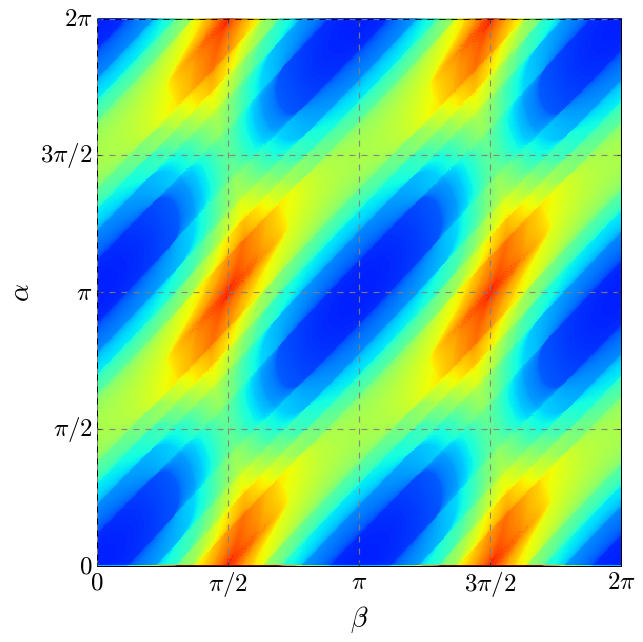

In [19]:
plt.figure(figsize=(9,9))
bins=500
Tvals = [0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi]
Tnames = (r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$')
#plt.title(r'Cut space random Na only',fontsize=20)
xedges, yedges = np.linspace(0, 2*np.pi, bins), np.linspace(0, 2*np.pi, bins)
#plt.hist2d(XX, YY,weights=ZZ, bins=(xedges, yedges), norm=LogNorm())
plt.hist2d(XX, YY,weights=ZZ, bins=(xedges, yedges))
plt.xticks(Tvals,Tnames,fontsize=25)
plt.yticks(Tvals,Tnames,fontsize=25)

#plt.colorbar()
#plt.clim(0,9.7)
plt.clim(0,2500)

plt.xlim(0,2*np.pi)
plt.ylim(0,2*np.pi)
plt.xlabel(r'$\beta$',fontsize=28)
plt.ylabel(r'$\alpha$',fontsize=28)
plt.grid(True,color='grey', linestyle='--', linewidth=1.2,alpha=0.9)
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/AB-colormap-ml.png')
plt.show()

In [54]:
percent2=np.array(percent2)

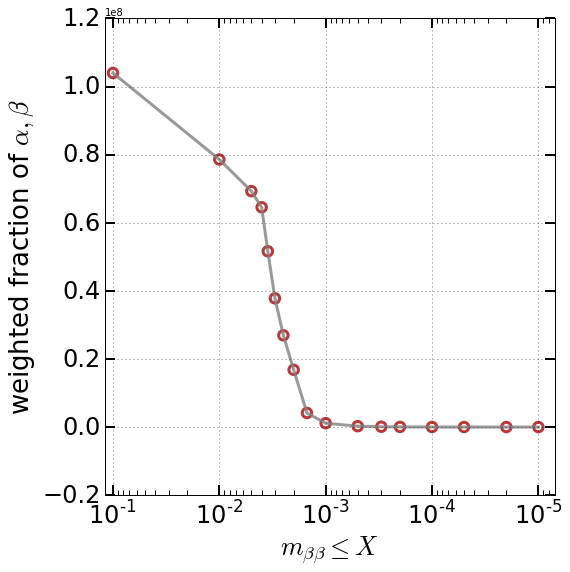

In [57]:
plt.figure(figsize=(8,8))

plt.semilogx(space,percent2,color='grey',linewidth=3,alpha=0.8)
#plt.loglog(space,percent2/250000,color='grey',linewidth=3,alpha=0.8)

plt.scatter(space,percent2, facecolors='none', edgecolors='firebrick',s=90,alpha=0.9,linewidth=3)

plt.ylabel(r"weighted fraction of $\alpha,\beta$",fontsize=26)
plt.xlabel(r'$m_{\beta\beta}\leq X$',fontsize=26)
#plt.xlabel(r'T$_{1/2}\leq X$',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.ylim(-0.01,1.01)
plt.xlim(1.2e-1,7e-6)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/mbb-fractionLx-weighted.png')
plt.show()

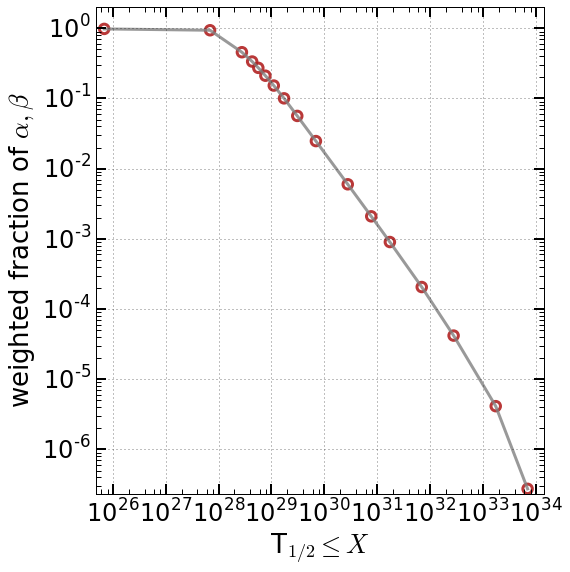

In [141]:
plt.figure(figsize=(8,8))

plt.loglog(Thalf(space),percent2/250000,color='grey',linewidth=3,alpha=0.8)
plt.scatter(Thalf(space),percent2/250000, facecolors='none', edgecolors='firebrick',s=90,alpha=0.9,linewidth=3)

plt.ylabel(r"weighted fraction of $\alpha,\beta$",fontsize=26)
plt.xlabel(r'T$_{1/2}\leq X$',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(-0.001,2)
plt.xlim(Thalf(1.2e-1),Thalf(7e-6))
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/mbb-fractionLx-weighted.png')
plt.show()

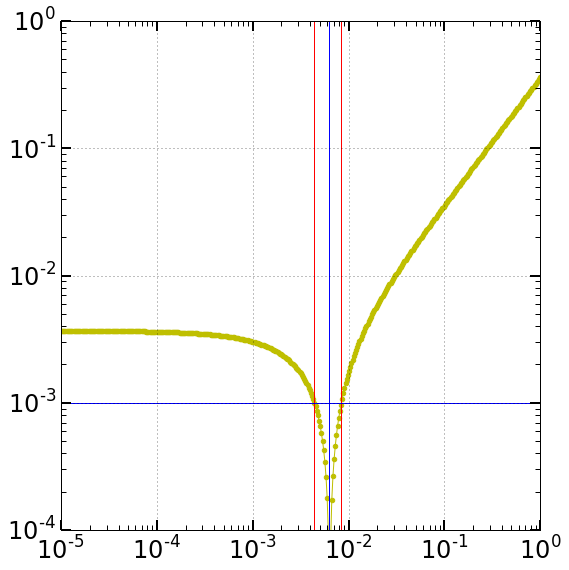

In [59]:
plt.figure(figsize=(8,8))
vals = np.logspace(-5,1,num=500)
#vals = np.linspace(1e-5,1,num=5000)

A = Anorm(vals,np.pi/2,np.pi/2)**2
B = Bnorm(vals,np.pi/2,np.pi/2)**2
t3 = np.sqrt(A+B)
plt.loglog(vals,t3,color='y',linewidth=1)
plt.scatter(vals,t3,color='y',linewidth=1)

plt.axvline(vals[233])
plt.axvline(vals[220],color='r')
plt.axvline(vals[243],color='r')



plt.axhline(1e-3)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(1e-4,1)
plt.xlim(1e-5,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/hierarchy-plots.png')
plt.show()

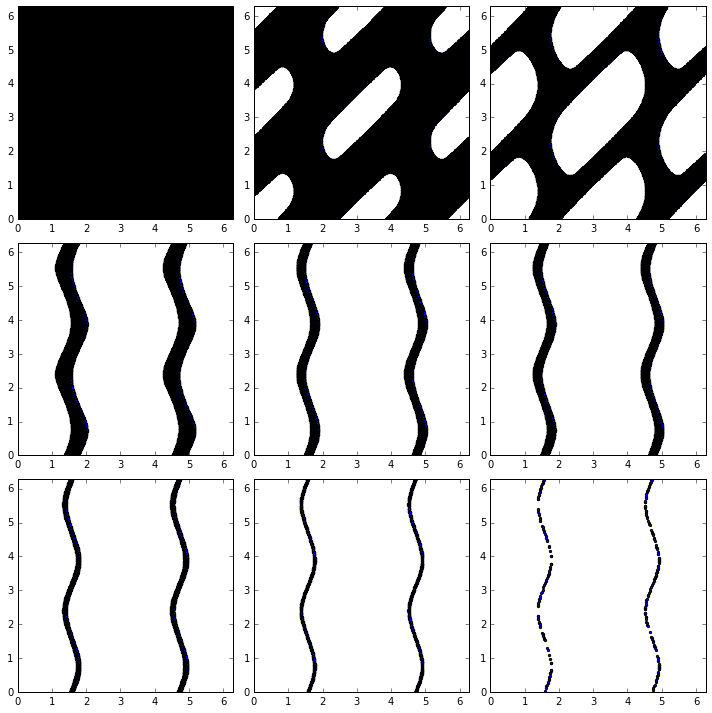

In [233]:
fig = plt.figure(figsize=(10, 10))
sub1 = plt.subplot(3, 3, 1)
X1, Y1 = zip(*angles[2])
sub1.scatter(X1,Y1,marker='.')
sub1.set_xlim(0, 2*3.14)
sub1.set_ylim(0, 2*3.14)

sub2 = plt.subplot(3, 3, 2,sharey=sub1)
X1, Y1 = zip(*angles[3])
sub2.scatter(X1,Y1,marker='.')
sub2.set_xlim(0, 2*3.14)
sub2.set_ylim(0, 2*3.14)

sub3 = plt.subplot(3, 3, 3)
X1, Y1 = zip(*angles[4])
sub3.scatter(X1,Y1,marker='.')
sub3.set_xlim(0, 2*3.14)
sub3.set_ylim(0, 2*3.14)

sub4 = plt.subplot(3, 3, 4)
X1, Y1 = zip(*angles[5])
sub4.scatter(X1,Y1,marker='.')
sub4.set_xlim(0, 2*3.14)
sub4.set_ylim(0, 2*3.14)

sub5 = plt.subplot(3, 3, 5)
X1, Y1 = zip(*angles[6])
sub5.scatter(X1,Y1,marker='.')
sub5.set_xlim(0, 2*3.14)
sub5.set_ylim(0, 2*3.14)

sub6 = plt.subplot(3, 3, 6)
X1, Y1 = zip(*angles[7])
sub6.scatter(X1,Y1,marker='.')
sub6.set_xlim(0, 2*3.14)
sub6.set_ylim(0, 2*3.14)

sub7 = plt.subplot(3, 3, 7)
X1, Y1 = zip(*angles[9])
sub7.scatter(X1,Y1,marker='.')
sub7.set_xlim(0, 2*3.14)
sub7.set_ylim(0, 2*3.14)

sub8 = plt.subplot(3, 3, 8)
X1, Y1 = zip(*angles[11])
sub8.scatter(X1,Y1,marker='.')
sub8.set_xlim(0, 2*3.14)
sub8.set_ylim(0, 2*3.14)

sub9 = plt.subplot(3, 3, 9)
X1, Y1 = zip(*angles[13])
sub9.scatter(X1,Y1,marker='.')
sub9.set_xlim(0, 2*3.14)
sub9.set_ylim(0, 2*3.14)


fig.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/angles-very.png')

plt.show()

In [44]:
#normal H
"""runing this at 1e-3 gives amin= pi/2 and bmin=pi
    doing the same ar 1e-2 gives amin=bmin=pi/2
    and doing this to find the maximum amax=bmax=0"""
#inverted
""" the min for Inverted is amin=bmin=pi/2
    the max is at amin=bmin=0 """
Mjvals = np.linspace(0, 2*3.14, num=1000) # 1000 works takes a min,
LMj = len(Mjvals)
con = 1
for x in range(0,LMj):
    for y in range(0,LMj):
        A = Anorm(1e-3,Mjvals[x],Mjvals[y])**2
        B = Bnorm(1e-3,Mjvals[x],Mjvals[y])**2
        test = np.sqrt(A+B)
        if test < con:
            con=test
            amin = Mjvals[x]
            bmin = Mjvals[y]
            


In [45]:
amin

1.5715715715715717

In [46]:
bmin

3.1431431431431434

In [282]:
vals = np.logspace(-5,0,num=3000)


In [14]:
vals = np.logspace(-5,0,num=3000)
'''3 sigma'''
Ne1=[]
Ne2=[]
Ne3=[]
Ie4=[]
Ie5=[]
for x in range(0,len(vals)):
    hold = E3norm.subs([(ml,vals[x]),(alpha,0),(beta,0)])
    Ne1.append(hold)
    hold = E3norm.subs([(ml,vals[x]),(alpha,np.pi/2),(beta,np.pi)])
    Ne2.append(hold)
    hold = E3norm.subs([(ml,vals[x]),(alpha,np.pi/2),(beta,np.pi/2)])
    Ne3.append(hold)
    hold = E3inv.subs([(ml,vals[x]),(alpha,0),(beta,0)])
    Ie4.append(hold)
    hold = E3inv.subs([(ml,vals[x]),(alpha,np.pi/2),(beta,np.pi/2)])
    Ie5.append(hold)
    
Ne1=np.array(Ne1).astype('float')
Ne2=np.array(Ne2).astype('float')
Ne3=np.array(Ne3).astype('float')
Ie4=np.array(Ie4).astype('float')
Ie5=np.array(Ie5).astype('float')

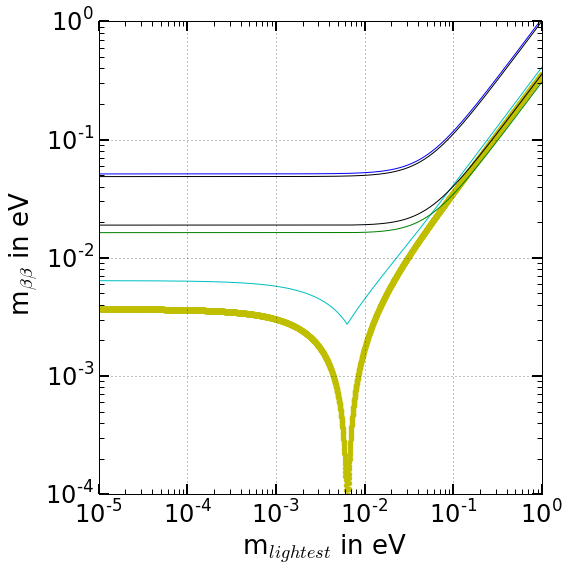

In [50]:
plt.figure(figsize=(8,8))

A = Anorm(vals,0,0)**2
B = Bnorm(vals,0,0)**2
t1 = np.sqrt(A+B)
A = Anorm(vals,np.pi/2,np.pi)**2
B = Bnorm(vals,np.pi/2,np.pi)**2
t2 = np.sqrt(A+B)
A = Anorm(vals,np.pi/2,np.pi/2)**2
B = Bnorm(vals,np.pi/2,np.pi/2)**2
t3 = np.sqrt(A+B)
'''plt.loglog(vals,t1,color='r',linewidth=1)
plt.loglog(vals,t1+Ne1,color='b',linewidth=1)'''

'''plt.loglog(vals,t2,color='c',linewidth=1)
plt.loglog(vals,t2-Ne2,color='g',linewidth=1)'''
plt.scatter(vals,t3,color='y',linewidth=1)
plt.loglog(vals,t3+Ne3,color='c',linewidth=1)


A = Ainv(vals,0,0)**2
B = Binv(vals,0,0)**2
t4 = np.sqrt(A+B)
A = Ainv(vals,np.pi/2,np.pi/2)**2
B = Binv(vals,np.pi/2,np.pi/2)**2
t5 = np.sqrt(A+B)
plt.loglog(vals,t4,color='k',linewidth=1)
plt.loglog(vals,t4+Ie4,color='b',linewidth=1)

plt.loglog(vals,t5,color='k',linewidth=1)
plt.loglog(vals,t5-Ie5,color='g',linewidth=1)

#plt.loglog(vals,aa,color='c')

plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' m$_{\beta\beta}$ in eV',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(1e-4,1)
plt.xlim(1e-5,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/hierarchy-plots.png')
plt.show()

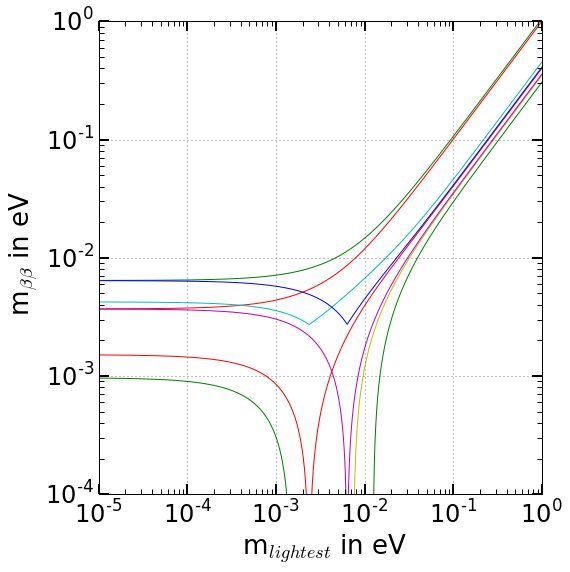

In [17]:
plt.figure(figsize=(8,8))

A = Anorm(vals,0,0)**2
B = Bnorm(vals,0,0)**2
t1 = np.sqrt(A+B)
A = Anorm(vals,np.pi/2,np.pi)**2
B = Bnorm(vals,np.pi/2,np.pi)**2
t2 = np.sqrt(A+B)
A = Anorm(vals,np.pi/2,np.pi/2)**2
B = Bnorm(vals,np.pi/2,np.pi/2)**2
t3 = np.sqrt(A+B)

plt.loglog(vals,t1,color='r',linewidth=1)
plt.loglog(vals,t1+Ne1,color='g',linewidth=1)

plt.loglog(vals,t2,color='r',linewidth=1)
plt.loglog(vals,t2+Ne2,color='c',linewidth=1)
plt.loglog(vals,t2-Ne2,color='y',linewidth=1)


plt.loglog(vals,t3,color='m',linewidth=1)

plt.loglog(vals,t3-Ne3,color='g',linewidth=1)
plt.loglog(vals,t3+Ne3,color='b',linewidth=1)


plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' m$_{\beta\beta}$ in eV',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(1e-4,1)
plt.xlim(1e-5,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/hierarchy-plots.png')
plt.show()

In [52]:
qw = (t1+Ne1)
qw=qw.astype('float')

In [53]:
qw.dtype

dtype('float64')

In [54]:
AllowedNLE3.dtype

dtype('float64')

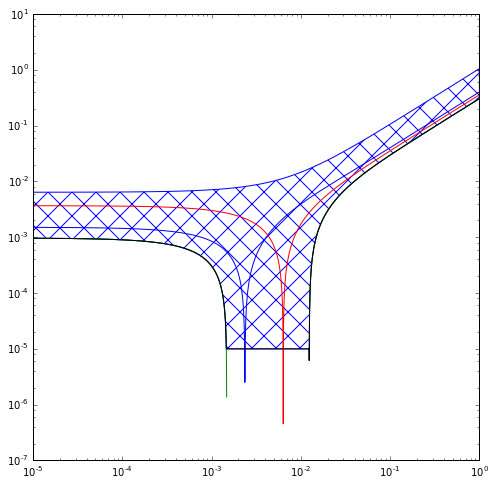

In [55]:
plt.figure(figsize=(8,8))
plt.loglog(vals,t2,color='b',linewidth=1)
plt.loglog(vals,t3,color='r',linewidth=1)
plt.loglog(vals,t3-Ne3,color='g',linewidth=1)
plt.loglog(vals,AllowedNLE3,color='k',linewidth=1)

#plt.loglog(vals,aa,color='c')

plt.fill_between(vals,qw,AllowedNLE3,color="",hatch="X",edgecolor="b")


In [283]:
min(t2-Ne1)

-0.000468591627118253

In [79]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
pL = find_nearest((t2),1e-5)
pR = find_nearest((t3),1e-5)
Left = np.where((t2)==pL)[0][0]
Right = np.where((t3)==pR)[0][0]
filler = np.ones(abs(Right-Left))*1e-5
LL = (t2)[0:Left]
RR = (t3)[Right:len(vals)]
aa = np.append(LL,filler)
AllowedNLE3 = np.append(aa,RR)

In [105]:
pL = find_nearest((t3-Ne3),1e-5)
pR = find_nearest((t3-Ne3)[1500:2000],1e-5)
Left = np.where((t3-Ne3)==pL)[0][0]
Right = np.where((t3-Ne3)==pR)[0][0]
filler = np.ones(abs(Right-Left))*1e-5
LL = (t3-Ne3)[0:Left]
RR = (t3-Ne3)[Right:len(vals)]
aa = np.append(LL,filler)
AllowedNLE3 = np.append(aa,RR)

In [103]:
Right

900

In [128]:
pL = find_nearest((t3-Ne3),1e-5)
pL

8.49226075720936e-6

In [130]:
pR = find_nearest((t3-Ne3)[1500:3000],1e-5)
pR

6.23739705210569e-6

In [129]:
np.where((t3-Ne3)==pL)

(array([1299]),)

In [131]:
np.where((t3-Ne3)==pR)

(array([1856]),)

In [54]:
len(aa)

2000

In [55]:
len(vals)

2000

In [311]:
len(LL)

343

In [56]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
"""finds allowed bandfor normal ordering"""
pL = find_nearest((t2),1e-5)
pR = find_nearest((t3),1e-5)
Left = np.where((t2)==pL)[0][0]
Right = np.where((t3)==pR)[0][0]
filler = np.ones(abs(Right-Left))*1e-5
LL = (t2)[0:Left]
RR = (t3)[Right:len(vals)]
aa = np.append(LL,filler)
AllowedN = np.append(aa,RR)
AllowedN=AllowedN.astype('float')
"""finds allowed 3 sigma for lower line"""
pL = find_nearest((t3-Ne3),1e-5)
pR = find_nearest((t3-Ne3)[1500:2000],1e-5)
Left = np.where((t3-Ne3)==pL)[0][0]
Right = np.where((t3-Ne3)==pR)[0][0]
filler = np.ones(abs(Right-Left))*1e-5
LL = (t3-Ne3)[0:Left]
RR = (t3-Ne3)[Right:len(vals)]
aa = np.append(LL,filler)
AllowedNLE3 = np.append(aa,RR)
AllowedNLE3=AllowedNLE3.astype('float')


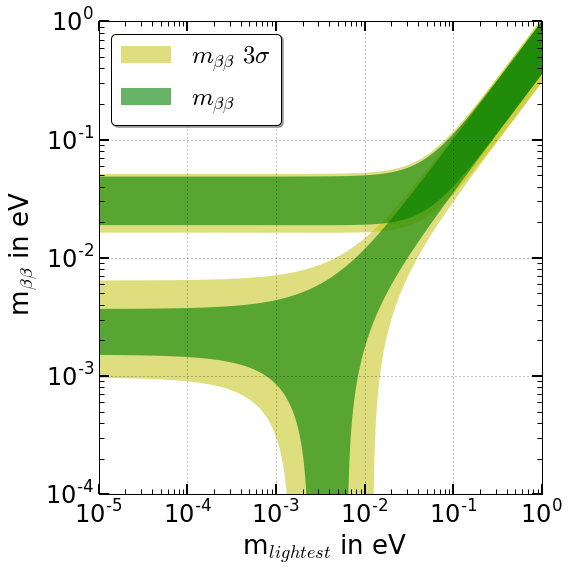

In [57]:
plt.figure(figsize=(8,8))

qw = (t1)
qw=qw.astype('float')
er = t1+Ne1
er=er.astype('float')
t4e = t4+Ie4 
t4e = t4e.astype('float')
t5e = t5-Ie5
t5e = t5e.astype('float')
aa=0.5

plt.loglog()

plt.fill_between(vals,er,AllowedNLE3,color="y",hatch="",edgecolor="",alpha=aa,label=r'$m_{\beta\beta}$ $3 \sigma$')
plt.fill_between(vals,t5e,t4e,color="y",hatch="",edgecolor="",alpha=aa)



plt.fill_between(vals,qw,AllowedN,color="g",hatch="",edgecolor="",alpha=aa+.1,label=r'$m_{\beta\beta}$')
plt.fill_between(vals,t5,t4,color="g",hatch="",edgecolor="",alpha=aa+.1)


plt.legend(loc='upper left',fontsize=25,shadow=True, fancybox=True)

plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' m$_{\beta\beta}$ in eV',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(1e-4,1)
plt.xlim(1e-5,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/hierarchy-plots-bands.png')
plt.show()

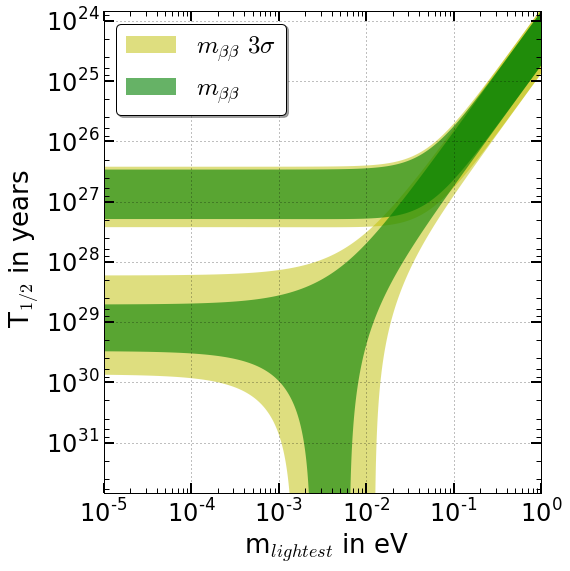

In [290]:
plt.figure(figsize=(8,8))

qw = (t1)
qw=qw.astype('float')
er = t1+Ne1
er=er.astype('float')
t4e = t4+Ie4 
t4e = t4e.astype('float')
t5e = t5-Ie5
t5e = t5e.astype('float')
aa=0.5

plt.loglog()

plt.fill_between(vals,Thalf(er),Thalf(AllowedNLE3),color="y",hatch="",edgecolor="",alpha=aa,label=r'$m_{\beta\beta}$ $3 \sigma$')
plt.fill_between(vals,Thalf(t5e),Thalf(t4e),color="y",hatch="",edgecolor="",alpha=aa)



plt.fill_between(vals,Thalf(qw),Thalf(AllowedN),color="g",hatch="",edgecolor="",alpha=aa+.1,label=r'$m_{\beta\beta}$')
plt.fill_between(vals,Thalf(t5),Thalf(t4),color="g",hatch="",edgecolor="",alpha=aa+.1)


plt.legend(loc='upper left',fontsize=25,shadow=True, fancybox=True)

plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' T$_{1/2}$ in years',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(Thalf(1e-4),Thalf(1))
plt.xlim(1e-5,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/hierarchy-plots-bands-T.png')
plt.show()

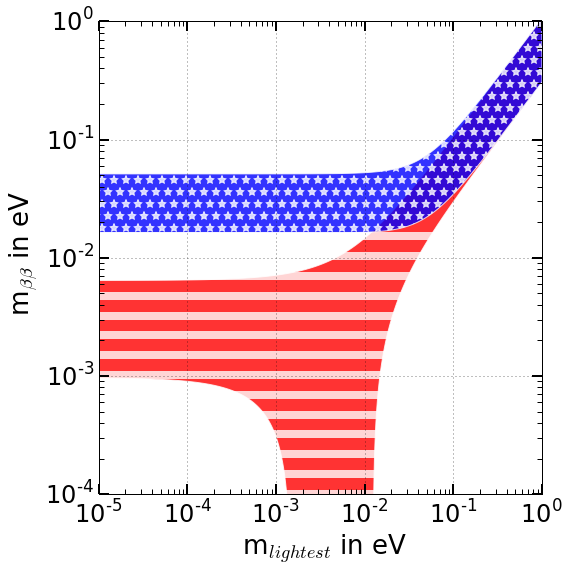

In [61]:
plt.figure(figsize=(8,8))

qw = (t1)
qw=qw.astype('float')
er = t1+Ne1
er=er.astype('float')
t4e = t4+Ie4 
t4e = t4e.astype('float')
t5e = t5-Ie5
t5e = t5e.astype('float')

aa = 0.8

plt.loglog()

stripes = np.logspace(-5,-1.82,num=20)
for x in range(0,len(stripes)):
    plt.axhline(y=stripes[x], color='w', linestyle='-',alpha=aa,linewidth=8)
    
plt.fill_between(vals,er,AllowedNLE3,color="r",hatch="",edgecolor="w",alpha=aa)
plt.fill_between(vals,t5e,t4e,color="b",hatch="*",edgecolor="w",alpha=aa)


plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' m$_{\beta\beta}$ in eV',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(1e-4,1)
plt.xlim(1e-5,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/hierarchy-plots-america.png')
plt.show()

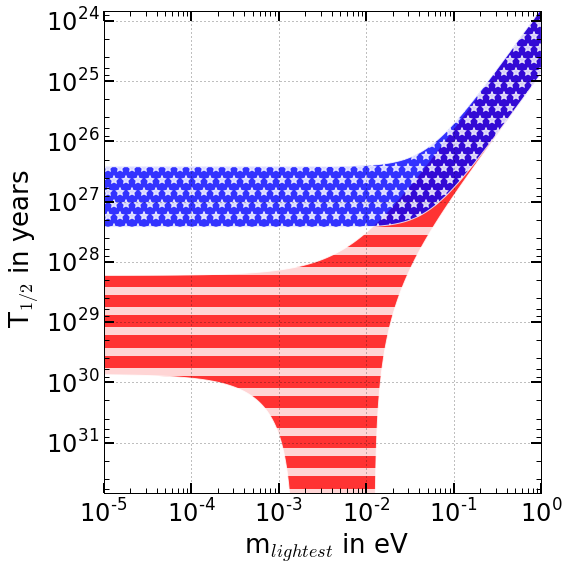

In [293]:
plt.figure(figsize=(8,8))

qw = (t1)
qw=qw.astype('float')
er = t1+Ne1
er=er.astype('float')
t4e = t4+Ie4 
t4e = t4e.astype('float')
t5e = t5-Ie5
t5e = t5e.astype('float')

aa = 0.8

plt.loglog()

stripes = np.logspace(-5,-1.82,num=20)
for x in range(0,len(stripes)):
    plt.axhline(y=Thalf(stripes[x]), color='w', linestyle='-',alpha=aa,linewidth=8)
    
plt.fill_between(vals,Thalf(er),Thalf(AllowedNLE3),color="r",hatch="",edgecolor="w",alpha=aa)
plt.fill_between(vals,Thalf(t5e),Thalf(t4e),color="b",hatch="*",edgecolor="w",alpha=aa)


plt.xlabel(r' m$_{lightest}$ in eV',fontsize=26)
plt.ylabel(r' T$_{1/2}$ in years',fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(Thalf(1e-4),Thalf(1))
plt.xlim(1e-5,1)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/hierarchy-plots-america-T.png')
plt.show()